In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings("ignore")

import watermark
import seaborn as sns

%load_ext watermark
%matplotlib inline

In [161]:
df=pd.read_csv('dataset.csv')
df.head()


,Unnamed: 0,Bacteria,Penicilin,Streptomycin,Neomycin,Gram Staining
0,NaN,Aerobacter aerogenes,870.000,1.00,1.600,negative
1,NaN,Brucella abortus,1.000,2.00,0.020,negative
2,NaN,Brucella anthracis,0.001,0.01,0.007,positive
3,NaN,Diplococcus pneumoniae,0.005,11.00,10.000,positive
4,NaN,Escherichia coli,100.000,0.40,0.100,negative


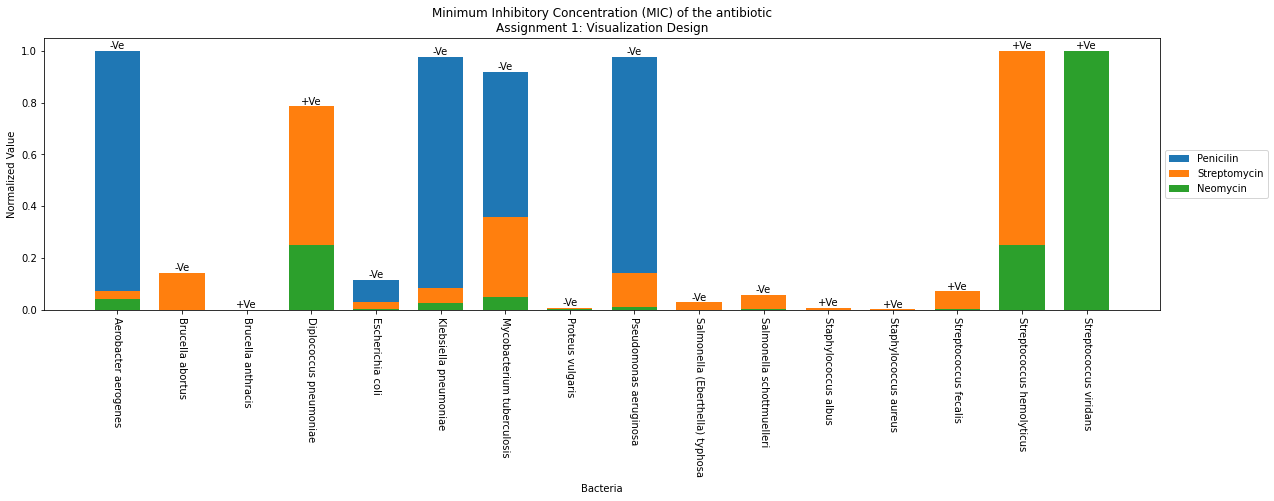

In [181]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = ['Penicilin','Streptomycin ','Neomycin']
df[cols_to_norm] = MinMaxScaler().fit_transform(df[cols_to_norm])

#Plotting
plt.figure(figsize=(20, 5))
plt.bar( df["Bacteria "], df["Penicilin"].values, label="Penicilin",align='center', width=0.7)
plt.bar( df["Bacteria "], df["Streptomycin "].values, label="Streptomycin",align='center', width=0.7)
plt.bar( df["Bacteria "],  df["Neomycin"].values, label="Neomycin",align='center', width=0.7)
for i in range(len( df["Bacteria "])):
    
    plt.annotate("+Ve" if df["Gram Staining "][i]=="positive" else "-Ve", xy=(df["Bacteria "][i], max( df["Penicilin"].values[i],df["Streptomycin "].values[i],df["Neomycin"].values[i])), ha='center', va='bottom')

plt.xticks(rotation=-90)
plt.ylabel("Normalized Value")
plt.xlabel("Bacteria")
plt.title("Minimum Inhibitory Concentration (MIC) of the antibiotic\nAssignment 1: Visualization Design")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('plot.png')